<a href="https://colab.research.google.com/github/Himson2006/Portfolio-Projects/blob/main/Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Source:
[Global Average Absolute Sea Level Change](https://datahub.io/core/sea-level-rise/), 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.

---



# Introduction:
In this data set, we have the data of average sea level change from 1880 through 2013. In this data, we have the years for the recorded data, CSIRO adjusted sea level, the lower error bound, the upper error bound, and NOAA Adjusted Sea Level.

---

##OBJECTIVE:

####***To Predict The Sea Level Change Through 2050***

---


## Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Reading in CSV file into DataFrame

In [ ]:
df = pd.read_csv('/content/Sea_Level_Data.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [ ]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648




---


#### Here, we see that the 'NOAA Adjusted Sea Level' column is mostly empty as among 134 years, only 21 have a valid data present in the 'NOAA Adjusted Sea Level' column.

#### Along with that we also do not necessarily need that column for predicting the sea level change through 2050 which is our goal.

---



## Dropping the 'NOAA Adjusted Sea Level' column

In [ ]:
df = df.drop(columns=['NOAA Adjusted Sea Level'])
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
0,1880,0.000000,-0.952756,0.952756
1,1881,0.220472,-0.732283,1.173228
2,1882,-0.440945,-1.346457,0.464567
3,1883,-0.232283,-1.129921,0.665354
4,1884,0.590551,-0.283465,1.464567


## Reading Axes Data for ScatterPlot

In [5]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

# Plotting Scatter Plot For The Data Given



---


#### We plot the scatter plot and the line of best fit for the scatter plot extending all the way to 2050 for our data prediction



---



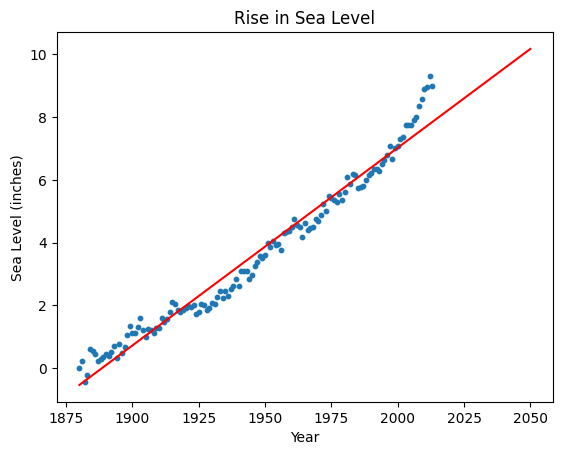

In [34]:
# Plotting the scatter plot based on the data provided
fig, ax = plt.subplots()

ax.scatter(x,y, s = 10, marker='o') #Draw the scatterplot
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level Change(inches)')
ax.set_title('Rise in Sea Level')

# Generating the line of best fit till years 2051 based on the data of previous years.
years_extended = pd.Series(range(x.min(), 2051)) # Years till 2050(inclusive) for line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y) # To get the slope and the intercept
best_fit_line = slope * years_extended + intercept # To get the line of best fit
ax.plot(years_extended, best_fit_line, color = 'r') # This draws the line



---



#### Here, although we see that the line of best fit indicates that the sea level change through 2050 would be approximately 10, we also see that the rate of increase in sea level change is different starting in the year 2000 (i.e the sea level has started increasing at an increasing rate from the year 2000). Hence the prediction we made based on the slope derived from years 1880 - 2013 will not be accurate.

#### Thus, we will get another line of best fit starting in the year 2000 to predict the value accurately.




---



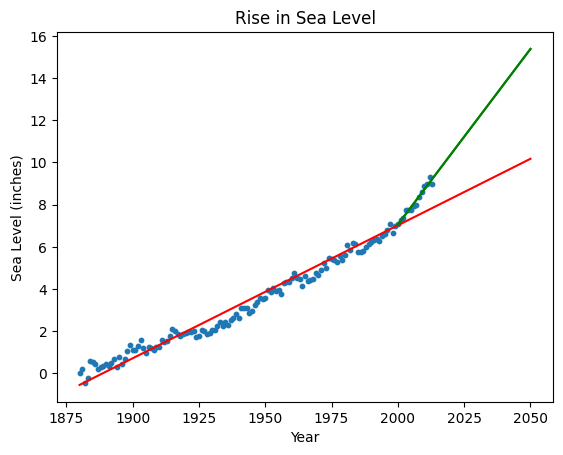

In [36]:
#Generating updated line of best fit based on the new trend
years_2 = pd.Series(range(2000, 2051)) #Series of years to determine the updated line of best fit after 2000
x2 = df[df['Year'] >= 2000]['Year']
y2 = df[df['Year'] >= 2000]['CSIRO Adjusted Sea Level']
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)
best_fit_line2 = slope2 * years_2 + intercept2
ax.plot(years_2, best_fit_line2, color = 'g')

fig



---



#### Here, we have created a new line of best fit that follows the trends of the data from 2000 onwards (i.e the trend after the increase in the rate of sea level change).

#### Thus, this gives us a more accurate prediction by keeping up with the latest data trends.



---



In [41]:
sea_level_before = slope * 2050 + intercept
print(f"The Sea Level Change Through Year 2050 using previous data trend would have been predicted to be {sea_level_before} inches")

The Sea Level Change Through Year 2050 using previous data trend would have been predicted to be 10.175455257136548 inches


In [42]:
sea_level_2050 = slope2 * 2050 + intercept2
print(f"The Sea Level Change Through Year 2050 with updated data trend is predicted to be {sea_level_2050} inches")

The Sea Level Change Through Year 2050 with updated data trend is predicted to be 15.382443524364874 inches




---



# Output:

## ***The Sea Level Change Through Year 2050 Will Be 15.382443524364874 inches.***



---


# Insights:

*   We see that by following the trend of sea level change between the years 1880 and 2013, our prediction for sea level change through the year 2050 would have been 10.175455257136548 inches.
*   But, due to the change in trend starting from year 2000, our predicted value for sea level change through year 2050 came out to be 15.382443524364874 inches.

##### Based on these points, we see that the difference between our predictions for sea level change through 2050 after following two different trends (prior to 2000 & 2000 onwards) is 5.2069882672 inches.

##### This difference is large and is almost equivalent to the upper quantile of the sea level change for the entire data set between the years 1880 and 2013, which is 5.587598 inches.



---



##### This suggests that starting in the year 2000, something has been happening that is promoting the increase of sea level change throughout the globe.


